### Failure Mode 1 — Sample Complexity in High Dimensions

This experiment visualizes the first failure mode identified in the paper: CMGPs require significantly more data to produce stable estimates as input dimensionality increases. The ARD kernel becomes unstable due to high variance in estimated lengthscales, which leads to overfitting unless the model is regularized or trained with very large sample sizes.

This heatmap plots root PEHE across a grid of covariate dimensionality (`d`) and sample sizes (`n`), reproducing Figure 3 in Section 4.1.1 of the paper. Dimensionality is increased by adding more effect modifiers while holding the number of confounders constant at 2.


In [10]:
from src.evaluate import evaluate_dataset

def plot_pehe_heatmap(
    d_list=[5, 10, 15, 20, 25, 30, 35],
    sample_sizes=range(50, 1500, 150),
    seeds=range(5),
    polynomial_degree=2,
    max_iterations=100
):
    """
    Computes and visualizes a heatmap of √PEHE values across varying dimensionality (d)
    and sample sizes to evaluate the sample complexity and overfitting behavior of CMGP.

    This function reproduces Experiment 1 (Failure Mode 1) as described in Section 4.1.1
    of the research paper. It shows how CMGP performance degrades with increasing input
    dimensionality when ARD becomes unstable, requiring more samples for stable estimates.

    Args:
        d_list (list[int]): Covariate dimensions to test (d = confounders + modifiers).
        sample_sizes (iterable[int]): Sample sizes for synthetic datasets.
        seeds (list[int]): Seeds for averaging across random splits.
        polynomial_degree (int): Degree of polynomial used in outcome generation.
        max_iterations (int): Max number of GP training iterations.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pathlib import Path

    heatmap_data = []

    for d in d_list:
        n_c = 2                   # Keep number of confounders fixed
        n_m = d - 2               # Vary number of effect modifiers
        row = []
        for n in sample_sizes:
            pehes = []
            for seed in seeds:
                result = evaluate_dataset(
                    "synthetic",
                    data_path=Path("src/data"),
                    n_confounders=n_c,
                    n_effect_modifiers=n_m,
                    n_instruments=0,
                    n_samples=n,
                    seed=seed,
                    polynomial_degree=polynomial_degree,
                    max_gp_iterations=max_iterations,
                    variance_ard=False,             # Disable enhancement for baseline
                    overlap_scaling=False           # Disable enhancement for baseline
                )
                pehes.append(result["√PEHE"])
            row.append(np.mean(pehes))
        heatmap_data.append(row)

    # Plotting the √PEHE heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        np.array(heatmap_data),
        xticklabels=list(sample_sizes),
        yticklabels=d_list,
        cmap="viridis",
        annot=True, fmt=".2f",
        cbar_kws={"label": "√PEHE"}
    )
    plt.xlabel("Sample Size")
    plt.ylabel("Covariate Dimension (d)")
    plt.title("√PEHE across Dimensionality and Sample Size (CMGP Baseline)")
    plt.tight_layout()
    plt.show()


 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in divide
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\rbf.py:178: RuntimeWarning:invalid value encountered in multiply
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in divide
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\logan\Documents\

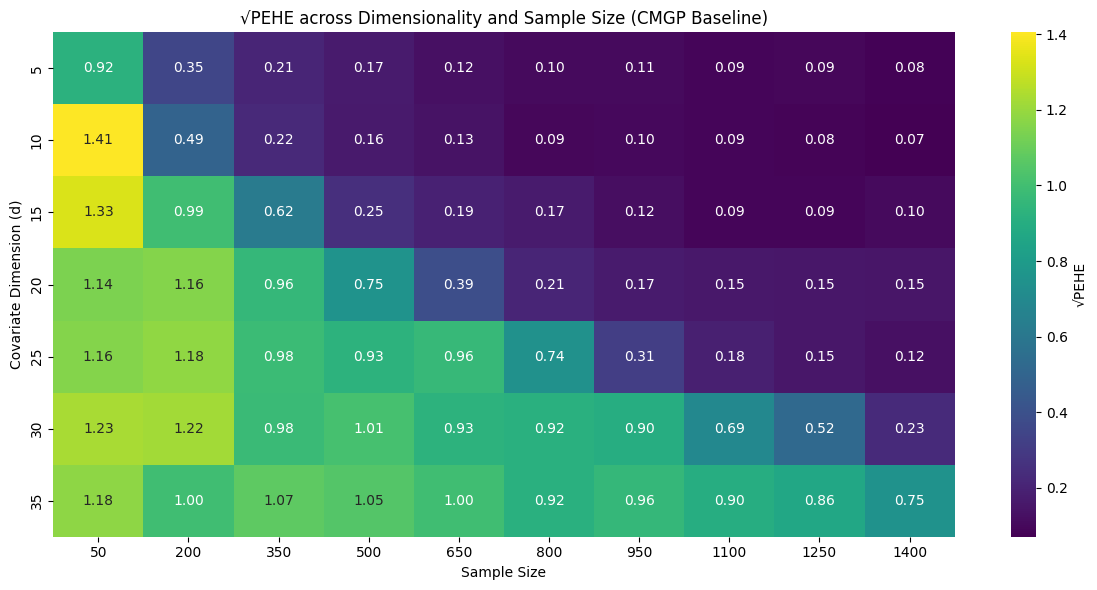

In [11]:
plot_pehe_heatmap()